In [1]:
# Supressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

# Styling the plot
style.use('ggplot')
sns.set_style('whitegrid')

In [3]:
# Adjusting Output Views
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
# Importing the Dataset
app = pd.read_csv('application_data.csv')
prev = pd.read_csv('previous_application.csv')

# 1. Understanding the dataset

### 1.1.a. Inspecting Application Dataset

In [5]:
app.shape

(307511, 122)

In [6]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
# Data types of each of the column in application data
app.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [8]:
# Checking statistical information about the numerical columns
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### 1.1.b. Inspecting Previous Application Dataset

In [9]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Data types of each of the column in previous application data
prev.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [11]:
# Checking statistical information about numerical columns in previous application dataset
prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# 2. Data Cleaning

### 2.1.a. Checking NULL values and Unnecessary Variables in Application dataset

In [12]:
# Percentage of null values in each column
round((app.isnull().sum()/len(app)*100.00), 4)

SK_ID_CURR                       0.0000
TARGET                           0.0000
NAME_CONTRACT_TYPE               0.0000
CODE_GENDER                      0.0000
FLAG_OWN_CAR                     0.0000
FLAG_OWN_REALTY                  0.0000
CNT_CHILDREN                     0.0000
AMT_INCOME_TOTAL                 0.0000
AMT_CREDIT                       0.0000
AMT_ANNUITY                      0.0039
AMT_GOODS_PRICE                  0.0904
NAME_TYPE_SUITE                  0.4201
NAME_INCOME_TYPE                 0.0000
NAME_EDUCATION_TYPE              0.0000
NAME_FAMILY_STATUS               0.0000
NAME_HOUSING_TYPE                0.0000
REGION_POPULATION_RELATIVE       0.0000
DAYS_BIRTH                       0.0000
DAYS_EMPLOYED                    0.0000
DAYS_REGISTRATION                0.0000
DAYS_ID_PUBLISH                  0.0000
OWN_CAR_AGE                     65.9908
FLAG_MOBIL                       0.0000
FLAG_EMP_PHONE                   0.0000
FLAG_WORK_PHONE                  0.0000


`Observation: There are many columns with more than 40% missing values.`

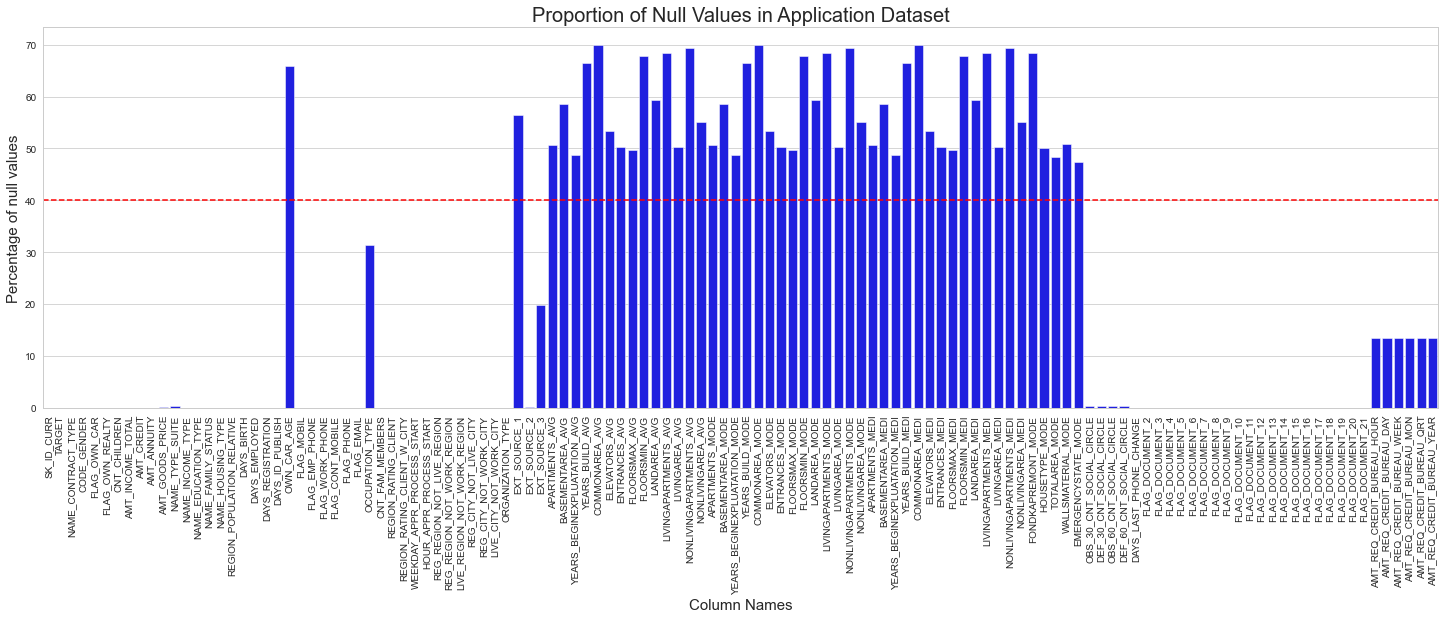

In [13]:
# Let us plot a bar graph to look at the proportion of null values with a benchmark of 40%
plt.figure(figsize = [25,7])
plt.title("Proportion of Null Values in Application Dataset",fontsize=20)
plt.xlabel("Column Names", fontsize=15)
plt.ylabel("Percentage of null values", fontsize= 15)
plt.xticks(rotation=90)
ax = sns.barplot(app.columns,round((app.isnull().sum()/app.shape[0])*100,2), color = 'blue')
ax.axhline(40, ls='--',color='red')
plt.show()

In [14]:
# Storing the columns names along their %age of NULL values
app_miss = pd.DataFrame((app.isnull().sum()/len(app))*100).reset_index()
app_miss.columns = ['Column Name', 'Null Value %age']

In [15]:
# Columns having more than 40% Null Values
app_miss_40 = app_miss[app_miss['Null Value %age']>=40]
app_miss_40

,Column Name,Null Value %age
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [16]:
len(app_miss_40)

49

`Observation: 49 columns have more than 40% NULL values of which most are related to the apartment details and won't help in our analysis. Hence, we will drop these columns.`

In [17]:
app_missing = pd.DataFrame((app.isnull().sum()/len(app))*100).reset_index()
app_missing.columns = ['Column Name', 'Percentage of NULL values']

In [18]:
# Columns having NULL Values
app_missing = app_missing[app_missing['Percentage of NULL values'] > 0]
app_missing

,Column Name,Percentage of NULL values
9,AMT_ANNUITY,0.003902
10,AMT_GOODS_PRICE,0.090403
11,NAME_TYPE_SUITE,0.420148
21,OWN_CAR_AGE,65.990810
28,OCCUPATION_TYPE,31.345545
29,CNT_FAM_MEMBERS,0.000650
41,EXT_SOURCE_1,56.381073
42,EXT_SOURCE_2,0.214626
43,EXT_SOURCE_3,19.825307
44,APARTMENTS_AVG,50.749729


In [19]:
# AMT_ANNUITY
app.AMT_ANNUITY.isnull().sum()

12

In [20]:
# Since, there are only 12 rows with missing values. So, we can delete these records
app = app[~app.AMT_ANNUITY.isnull()]

In [21]:
# AMT_GOODS_PRICE
app.AMT_GOODS_PRICE.isnull().sum()

278

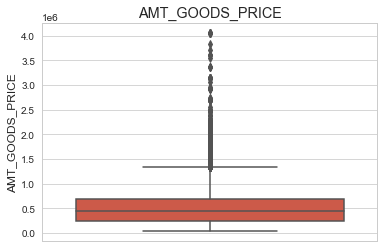

In [22]:
plt.title('AMT_GOODS_PRICE')
ax = sns.boxplot(y = app.AMT_GOODS_PRICE)
plt.show()

In [23]:
# We can clearly see that there are many outliers. So, imputing the NULL values with median
app.AMT_GOODS_PRICE = app.AMT_GOODS_PRICE.fillna(app.AMT_GOODS_PRICE.median())

In [24]:
# NAME_TYPE_SUITE
app.NAME_TYPE_SUITE.isnull().sum()

1292

In [25]:
# Since, NAME_TYPE_SUITE is a categorical variable and have a lower NULL percentage.
# So, we will use mode to impute the NULL values for this variable
app.NAME_TYPE_SUITE = app.NAME_TYPE_SUITE.fillna(app.NAME_TYPE_SUITE.mode()[0])

In [26]:
# OCCUPATION_TYPE
# This column has more than 30% NULL values. So, we will make a separate category 'Unknown' for the NULL values
app.OCCUPATION_TYPE = app.OCCUPATION_TYPE.fillna('Unknown')

In [27]:
# CNT_FAM_MEMBERS
app.CNT_FAM_MEMBERS.isnull().sum()

2

In [28]:
# Since, there are just 2 records with missing values. So, we will delete these rows.
app = app[~app.CNT_FAM_MEMBERS.isnull()]

In [29]:
# DAYS_LAST_PHONE_CHANGE
app.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [30]:
# Since, there is just 1 record with missing values. So, we will delete these rows.
app = app[~app.DAYS_LAST_PHONE_CHANGE.isnull()]

In [31]:
# AMT variables
app[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265980.000000,265980.000000,265980.000000,265980.000000,265980.000000,265980.000000
mean,0.006403,0.007001,0.034352,0.267385,0.265475,1.899929
std,0.083851,0.110760,0.204664,0.916011,0.794068,1.869215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [32]:
# Since, these are the number of enquires and it can only be integers. So, imputing the NULL values with median
# as median is an integer
amt = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for i in amt:
    app[i].fillna(app[i].median(),inplace = True)

In [33]:
# SOCIAL variables
app[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
     'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306475.000000,306475.000000,306475.000000,306475.000000
mean,1.422292,0.143428,1.405338,0.100054
std,2.401032,0.446708,2.379846,0.362299
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


In [34]:
# Since, these variables indicate the number of people and it can only be integers.
# So, imputing the NULL values with median.
soc = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
     'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

for i in soc:
    app[i].fillna(app[i].median(),inplace = True)

In [35]:
# Checking for the NULL values again
print(app.isnull().sum())
print('Shape: ', app.shape)

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202918
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [36]:
# Let's check the relationship of EXT_SOURCE variables with the TARGET variables
source = app[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']]

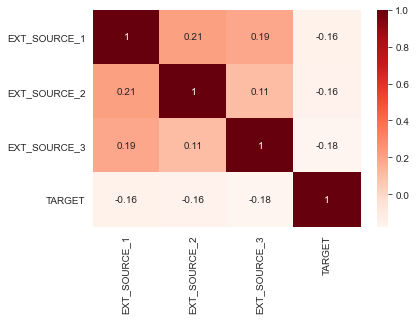

In [37]:
sns.heatmap(source.corr(),
            xticklabels= source.columns,
            yticklabels= source.columns,
            annot=True,
            cmap = 'Reds')
plt.show()

`Observation: Since, the correlation of the EXT_SOURCE variables is very low with the TARGET variable, we can drop these.`

In [38]:
# Adding these SOURCE variables to the above 49 variables which are to be dropped
app_unwanted = app_miss_40['Column Name'].to_list() + ['EXT_SOURCE_2', 'EXT_SOURCE_3']
len(app_unwanted)

51

In [39]:
# Importance of FLAG_DOCUMENTS
app_flag = app.loc[:, 'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21']
app_flag['TARGET'] = app['TARGET']

In [40]:
# For the ease of undertanding, replacing the 1 and 0 in TARGET variable with 'Defaulter' and 'Non-Defaulter' respectively
app_flag['TARGET'] = app_flag['TARGET'].replace({1 : 'Defaulter', 0 : 'Non-Defaulter'})

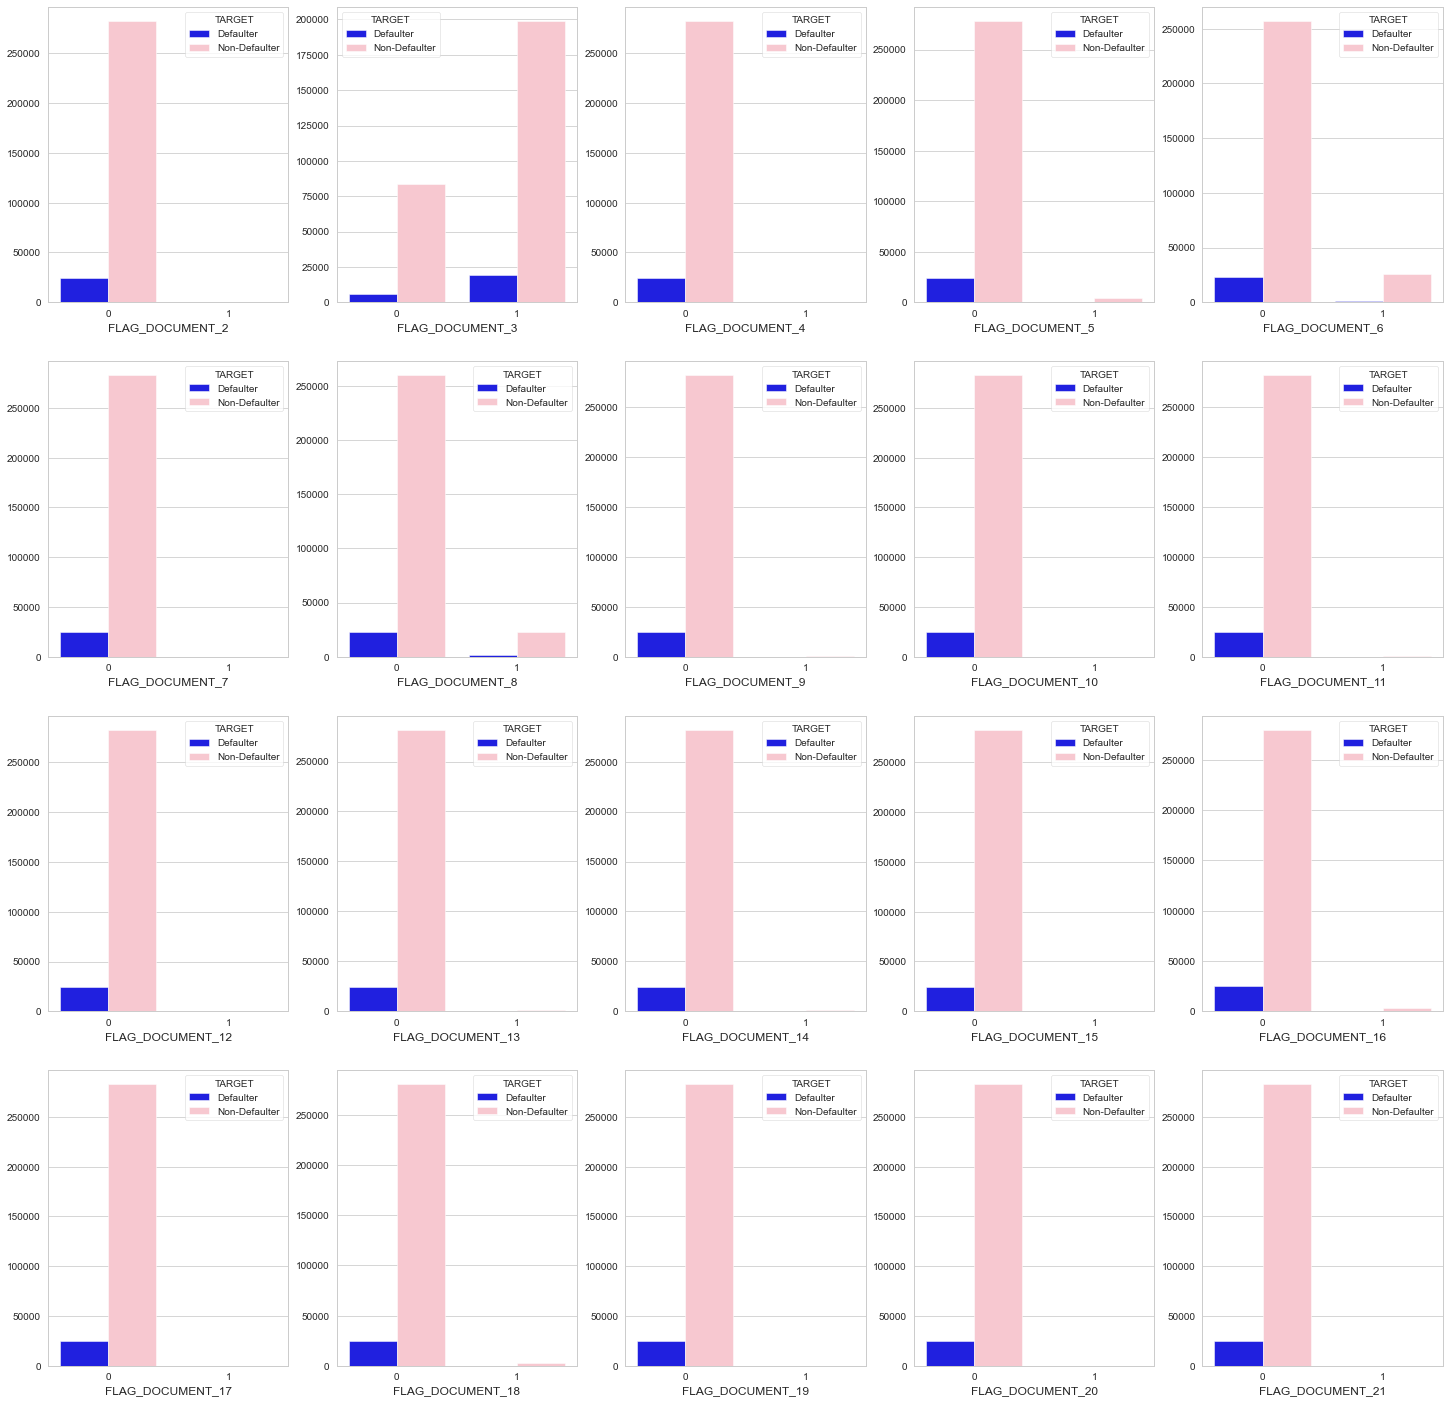

In [41]:
# Plotting the countplot of FLAG_DOCUMENTS with TARGET VARIABLE
fig = plt.figure(figsize=(25,25))
for a, b in zip(app_flag, range(0,20)):                         # range(0,20) : for 20 FLAG_DOCUMENTS
    plt.subplot(4,5,b+1)
    ax = sns.countplot(app_flag[a], hue = app_flag['TARGET'], palette = ['blue', 'pink'])
    plt.ylabel("")

`Observation: People who submitted FLAG_DOCUMENT_3 are more likely to not default on loan and hence, this must be an important document. While the other FLAG_DOCUMENTS follow a similar pattern that is even if they did not submit, they were able to repay the loan. So, we should retain this FLAG_DOCUMENT_3 column and drop the remaining FLAG_DOCUMENTS.`

In [42]:
flag_cols = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
             'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
             'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
             'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
             'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [43]:
app_unwanted = app_unwanted + flag_cols
len(app_unwanted)

70

In [44]:
# Importance of Contact-related Columns
contact = app.loc[:, 'FLAG_MOBIL':'FLAG_EMAIL']
contact['TARGET'] = app['TARGET']

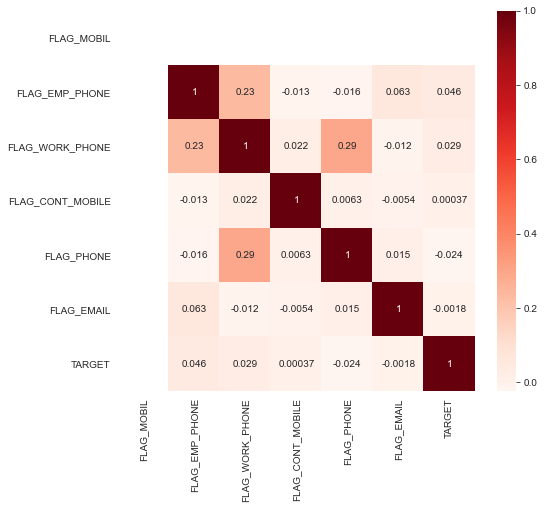

In [45]:
# Correlation of Contact-related information with the TARGET variable
plt.figure(figsize = (8,7))
sns.heatmap(contact.corr(),
            cmap="Reds",
            annot=True)
plt.show()

`Observation: As we can see from the above heatmap that there is no significant impact of Contact-related information on TARGET variables and would not affect our analysis. So, we can drop these columns.`

In [46]:
contact_cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']
app_unwanted = app_unwanted + contact_cols
len(app_unwanted)

76

In [47]:
# Dropping these 76 variables from our Application Dataset
app.drop(labels=app_unwanted, axis=1, inplace=True)

In [48]:
# Checking the shape of our dataframe after dropping these columns
app.shape

(307496, 46)

`Observation: After dropping these unwanted variables, we are left with 46 variables in our application dataset.`

In [49]:
# Checking for the Numerical columns in the remaining dataset
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307496.000000,307496.000000,307496.000000,3.074960e+05,3.074960e+05,307496.000000,3.074960e+05,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000,307496.000000
mean,278182.749285,0.080733,0.417072,1.687963e+05,5.990281e+05,27108.549241,5.383189e+05,0.020868,-16037.100707,63818.252094,-4986.126746,-2994.218507,2.152682,2.052479,2.031535,12.063328,0.015142,0.050755,0.040644,0.078167,0.230445,0.179544,1.417570,0.142951,1.400672,0.099722,-962.863400,0.710032,0.005538,0.006055,0.029714,0.231284,0.229632,1.778426
std,102790.172484,0.272425,0.722133,2.371280e+05,4.024942e+05,14493.802393,3.692923e+05,0.013831,4363.992221,141278.466175,3522.867752,1509.451425,0.910693,0.509032,0.502735,3.265852,0.122116,0.219498,0.197465,0.268434,0.421119,0.383808,2.398438,0.446042,2.377267,0.361743,826.811646,0.453748,0.078016,0.103040,0.190708,0.856820,0.744072,1.765450
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189150.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.000000,-4299.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278204.500000,0.000000,0.000000,1.469048e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367144.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,-274.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


`Observation: We can see that columns related to the DAYS are negative. So, let's convert them into positive values.`

In [50]:
# DAYS Columns
app.loc[:,"DAYS_BIRTH": "DAYS_ID_PUBLISH"] = abs(app.loc[:,"DAYS_BIRTH": "DAYS_ID_PUBLISH"])

### 2.1.b. Checking NULL values and Unncecessary Variables in Previous Application dataset

In [ ]:
# Percentage of null values in each column
round((prev.isnull().sum()/len(prev)*100.00), 4)

SK_ID_PREV                      0.0000
SK_ID_CURR                      0.0000
NAME_CONTRACT_TYPE              0.0000
AMT_ANNUITY                    22.2867
AMT_APPLICATION                 0.0000
AMT_CREDIT                      0.0001
AMT_DOWN_PAYMENT               53.6365
AMT_GOODS_PRICE                23.0818
WEEKDAY_APPR_PROCESS_START      0.0000
HOUR_APPR_PROCESS_START         0.0000
FLAG_LAST_APPL_PER_CONTRACT     0.0000
NFLAG_LAST_APPL_IN_DAY          0.0000
RATE_DOWN_PAYMENT              53.6365
RATE_INTEREST_PRIMARY          99.6437
RATE_INTEREST_PRIVILEGED       99.6437
NAME_CASH_LOAN_PURPOSE          0.0000
NAME_CONTRACT_STATUS            0.0000
DAYS_DECISION                   0.0000
NAME_PAYMENT_TYPE               0.0000
CODE_REJECT_REASON              0.0000
NAME_TYPE_SUITE                49.1198
NAME_CLIENT_TYPE                0.0000
NAME_GOODS_CATEGORY             0.0000
NAME_PORTFOLIO                  0.0000
NAME_PRODUCT_TYPE               0.0000
CHANNEL_TYPE             

In [ ]:
# Let us plot a bar graph to look at the proportion of null values with a benchmark of 40%
plt.figure(figsize = [25,7])
plt.title("Proportion of Null Values in Previous Application Dataset",fontsize=20)
plt.xlabel("Columns", fontsize=15)
plt.ylabel("%null values", fontsize= 15)
plt.xticks(rotation=90)
ax = sns.barplot(prev.columns,round((prev.isnull().sum()/prev.shape[0])*100,2), color = 'blue')
ax.axhline(40, ls='--',color='red')
plt.show()

`Observation: There are quite a few columns with more than 40% missing values.`

In [ ]:
# Storing columns names along their %age of NULL values
prev_miss = pd.DataFrame((prev.isnull().sum()/len(prev))*100).reset_index()
prev_miss.columns = ['Column Name', 'Null Value %age']

In [ ]:
# Columns having more than 40% Null Values
prev_miss_40 = prev_miss[prev_miss['Null Value %age']>=40]
prev_miss_40

In [ ]:
len(prev_miss_40)

`Observation: 11 columns have more than 40% NULL values. Hence, we will drop these columns.`

In [ ]:
prev_miss[prev_miss['Null Value %age'] < 40]

In [ ]:
# Adding 4 more variables to the unwanted list which won't help in our analysis
prev_unwanted = prev_miss_40['Column Name'].to_list() + ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
len(prev_unwanted)

In [ ]:
# Dropping these unwanted variables from our Previous Application dataset
prev.drop(labels = prev_unwanted, axis=1, inplace=True)

In [ ]:
prev.info(verbose=True)

In [ ]:
### Handling NULL values in previous dataframe.
#Checking null values percentage of each column.
(prev.isnull().sum()/len(prev)).sort_values(ascending=False)*100

In [ ]:
# AMT_GOODS_PRICE
prev.AMT_GOODS_PRICE.plot.box();

In [ ]:
#As there are many outliers in this column, we will use median to impute null values.
prev.AMT_GOODS_PRICE = prev.AMT_GOODS_PRICE.fillna(prev.AMT_GOODS_PRICE.median())
prev.AMT_GOODS_PRICE.isnull().sum()

In [ ]:
# CNT_PAYMENT
prev.CNT_PAYMENT.plot.box();

In [ ]:
prev.CNT_PAYMENT.describe()

In [ ]:
# Checking the NAME_CONTRACT_STATUS against NULL values in the CNT_PAYMENT.
prev[prev.CNT_PAYMENT.isnull()]["NAME_CONTRACT_STATUS"].value_counts()

In [ ]:
# Since, many of the orders were canceled or refused indicating that loan was not even started.
# So, there can not be any payment against them.  
prev.CNT_PAYMENT = prev.CNT_PAYMENT.fillna(0)
prev.CNT_PAYMENT.isnull().sum()

In [ ]:
# AMT_ANNUITY
prev.AMT_ANNUITY.isnull().sum()
prev.AMT_ANNUITY.plot.box();

In [ ]:
# As we can see from the boxplot, AMT_ANNUITY has many outliers, 
# therefore we will impute null values using median in this case too.
prev.AMT_ANNUITY=prev.AMT_ANNUITY.fillna(prev.AMT_ANNUITY.median())
prev.AMT_ANNUITY.isnull().sum()

In [ ]:
# PRODUCT_COMBINATION
# As this is a categorial column, we will use mode to impute the missing values.
prev.PRODUCT_COMBINATION = prev.PRODUCT_COMBINATION.fillna(prev.PRODUCT_COMBINATION.mode()[0])
prev.PRODUCT_COMBINATION.isnull().sum()

In [ ]:
# AMT_CREDIT
prev.AMT_CREDIT.isnull().sum()

In [ ]:
# As there is only a single missing value, we will drop this record
prev = prev[~prev.AMT_CREDIT.isnull()]

In [ ]:
prev.shape

### 2.2.a. Inspecting Data Types of Variables in Application Dataset

In [ ]:
app.info()

In [ ]:
app.nunique().sort_values()

In [ ]:
cat_col = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for a in cat_col:
    app[a] =pd.Categorical(app[a])

In [ ]:
app.info()

### 2.2.b. Inspecting Data Types of Variables in Previous Application Dataset

In [ ]:
#Converting Categorical columns from Object to categorical 
cat_col = ['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION']

for i in cat_col:
    prev[i] =pd.Categorical(prev[i])

In [ ]:
prev.dtypes

### 2.3.a Data Engineering on Application Dataset

In [ ]:
# Calculating client's age in year format
app['AGE'] = app['DAYS_BIRTH'] // 365

In [ ]:
# AGE column
bins = [0, 20, 30, 40, 50, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50+']
app['AGE_GROUP'] = pd.cut(app.AGE, bins = bins, labels= labels)
app.AGE_GROUP.value_counts(normalize=True)*100

In [ ]:
# AMT_CREDIT
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,10000000]
labels = ['0-100K','100K-200K', '200K-300K','300K-400K','400K-500K','500K-600K','600K-700K','700K-800K',
       '800K-900K','900K-1M', '1M Above']
app['AMT_CREDIT_RANGE'] = pd.cut(app.AMT_CREDIT, bins=bins, labels=labels)
app.AMT_CREDIT_RANGE.value_counts(normalize=True)*100

In [ ]:
# AMT_INCOME_TOTAL
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,10000000]
labels = ['0-100K','100K-200K', '200K-300K','300K-400K','400K-500K','500k-600K','600K-700K','700K-800K',
       '800K-900K','900K-1M', '1M Above']
app['AMT_INCOME_RANGE'] = pd.cut(app.AMT_INCOME_TOTAL, bins=bins, labels=labels)
app.AMT_INCOME_RANGE.value_counts(normalize=True)*100

In [ ]:
# AMT_INCOME_RANGE
app = app[~app.AMT_INCOME_RANGE.isnull()]

In [ ]:
# YEARS_EMPLOYED
app['YEARS_EMPLOYED'] = app['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,1000]
labels = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']
app['EMPLOYMENT_YEAR_RANGE'] = pd.cut(app['YEARS_EMPLOYED'],bins=bins,labels=labels)
app.EMPLOYMENT_YEAR_RANGE.value_counts(normalize = True)*100

In [ ]:
plt.title('YEARS_EMPLOYED')
ax = sns.distplot(app.YEARS_EMPLOYED);
ax.set_facecolor('white')

`Observation: Since, YEARS_EMPLOYED has values approx 1000 indicating that the person has been working for 1000 years which is impossible. Hence this column has a lot of incorrect values. So, we will drop 'DAYS_EMPLOYED', 'YEARS_EMPLOYED', 'EMPLOYMENT_YEAR_RANGE' so that it does not hinder with our analysis later on.`

In [ ]:
app.drop(['DAYS_EMPLOYED', 'YEARS_EMPLOYED', 'EMPLOYMENT_YEAR_RANGE'], axis = 1, inplace=True)

### 2.3.b. Data Engineering on Previous Application Dataset

In [ ]:
# DAYS_DECISION
prev.DAYS_DECISION.describe()

In [ ]:
# Converting Negative days value to Positive
prev.DAYS_DECISION = abs(prev.DAYS_DECISION)

In [ ]:
sns.distplot(prev.DAYS_DECISION);

In [ ]:
# Binning the DAYS_DECISION to get a better look at the variable
bins = [0,500,1000,1500,2000,2500,3000]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000']
prev['DAYS_DECISION_GROUP'] = pd.cut(prev.DAYS_DECISION, bins = bins, labels=labels)

In [ ]:
prev.DAYS_DECISION_GROUP.value_counts()

In [ ]:
prev.info()

In [ ]:
prev.nunique().sort_values()

### 2.4.a. Outliers in Application Dataset

In [ ]:
app.dtypes

In [ ]:
plt.figure(figsize=(20,10))

col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','CNT_CHILDREN','DAYS_BIRTH']
for i in col_1:
    plt.subplot(2,3,col_1.index(i)+1)
    ax = sns.boxplot(y=app[i])
    plt.title(i)
    plt.ylabel("")
    ax.set_facecolor('white')

In [ ]:
round(app[['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE', 'CNT_CHILDREN','DAYS_BIRTH']].describe(), 2)

Observation:
- AMT_INCOME_TOTAL: There is an outlier very far from the normal data. Since it is an Income column there might be wealthy people included in the dataset.
- 75% of applicants have taken a credit amount less than 800K.
- AMT_GOODS_PRICE also has number of outliers, but these goods prices are matching with the credit amount since they may have taken the loan for purchasing those goods.
- DAYS_BIRTH column doesn't have any outliers, this shows that DAYS_BIR.

### 2.4.b. Outliers in Previous Application Dataset

In [ ]:
plt.figure(figsize = (20, 10))

col_2 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT','SELLERPLACE_AREA']

for i in col_2:
    plt.subplot(2,4,col_2.index(i)+1)
    ax = sns.boxplot(y=prev[i])
    plt.title(i)
    plt.ylabel("")
    ax.set_facecolor('white')

In [ ]:
round(prev[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA',
            'DAYS_DECISION','CNT_PAYMENT']].describe(), 2)

Observation:
- DAYS_DECISION has few amount of outliers indicating that the previous application decisions were taken in a few days        when the application was last applied
- AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA are distributed compactly with huge            outliers and are quite a few in number.
- Since, AMT_GOODS_PRICE has a number of outliers. To buy these goods people apply for a larger amount of loan (thus, indicating why there are outliers in the AMT_APPLICATION) and hence, receive higher amount of Credits explaining the outliers in the AMT_CREDIT column.

# 3. Data Analysis

### 3.1.a. Data Imbalance in Application Dataset

In [ ]:
### Checking if the data is Imbalanced
Imbalance = app.TARGET.value_counts().reset_index()

plt.figure(figsize=(10,10))
x= ['Non-Defaulter','Defaulter']
Imbalance.plot.pie(autopct='%1.1f%%', y="TARGET",
                   labels=["Non-Defaulters","Defaulters"], shadow=True,
                   explode=(0.2,0), legend=False, colors=["#DC143C","#FFF8DC"])
plt.ylabel("")
plt.title("Imbalance Plotting")
ax.set_facecolor("white")
plt.show()

In [ ]:
# Calculating the percentage of defaulters and non-Defaulters in the dataset, using the target column.
# Non-Defaulter ---> 0 
# Defaulter ---> 1
Defaulter_percent = round((np.sum(app.TARGET) / len(app))*100, 2)
Non_Defaulter_percent = round((app.shape[0]-np.sum(app.TARGET))/app.shape[0]*100,2)
print("Percentage of Non-defaulter and Defaulter datas are:",
      Non_Defaulter_percent,"% and",Defaulter_percent, '%')
print("Imbalance Ratio of Non-Defaulter to Defaulter in the data is:",
      round(Non_Defaulter_percent/Defaulter_percent,2),": 1") 

### 3.2. Univariate Analysis

#### 3.2.a. Categorical Variables

In [ ]:
#### Customized function for Univariate Categorical Analysis

def cat_univ(data, var, broad=False, log = False,
             loc = 'upper right', label_rotate = False):# var = categorical variable under analysis
    data = data
    var = var
    
    if loc == 'upper left':
        loc = 'upper left'
    else:
        'upper right'
        
    if broad:
        fig, ax = plt.subplots(1,2, figsize = (20,7))
    else:
        fig, ax = plt.subplots(1,2,figsize=(10,5))

    def_perc = data[[var,"TARGET"]].groupby(var, as_index=False).mean()
    def_perc['TARGET'] = def_perc['TARGET']*100
    def_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    # Subplot 1
    ax1 = sns.countplot(data = data, x = var, hue = 'TARGET', ax = ax[0])
    ax1.set_title(var, fontdict = {'fontsize': 13, 'color': 'red'})
    ax1.legend(['Non-Defaulter', 'Defaulter'], loc = loc)
    ax1.set_ylabel('Number of Customers')
    if (label_rotate):
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
    
    if log:                              # Using log scale to increase the readibility of the graph
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3})  
    
    # Subplot 2
    ax2 = sns.barplot(data=def_perc ,x=var, y="TARGET", palette='Set1', ax = ax[1], order=def_perc[var])
    ax2.set_title('Percentage Defaulters', fontdict = {'fontsize': 13, 'color': 'red'})
    ax2.set_ylabel('Percentage of Defaulters')
    if (label_rotate):
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)

In [ ]:
# NAME_CONTRACT_TYPE
cat_univ(app, 'NAME_CONTRACT_TYPE', broad = True)

Observation:
- There are very less customers with revolving loans and 5% of them have not repaid the loan.
- Approximately 8% of people with cash loans have not repaid the loan.

In [ ]:
# CODE_GENDER
cat_univ(app, 'CODE_GENDER')

Observation:
- Female customers have taken more loans but male customers have higher number of defaulters.

In [ ]:
# FLAG_OWN_CAR
cat_univ(app, 'FLAG_OWN_CAR')

Observation:
- People who don't own a car have take more number of loans but the percentage of defaulters for both the categories is almost the same.

In [ ]:
# FLAG_OWN_REALTY
cat_univ(app, 'FLAG_OWN_REALTY')

Observation:
- People who own Realty have taken more number of loans but the percentage of defaulters for the categories is almost the same.

In [ ]:
# NAME_HOUSING_TYPE
cat_univ(app, 'NAME_HOUSING_TYPE', label_rotate=True, broad = True)

Observation:
- People with House/Apartment have taken most number of loans.
- Higher percentage of people who have not repaid the loans live in either Rented Apartments or with their parents.

In [ ]:
# NAME_FAMILY_STATUS
cat_univ(app, 'NAME_FAMILY_STATUS', label_rotate=True, broad = True)

Observation:
- Married people have taken most number of loans.
- Civil Marriage folks and Single/Unmarried are the ones who defaulted on the most number of loans.
- Widows have defualted on least number of loans.

In [ ]:
# NAME_EDUCATION_TYPE
cat_univ(app, 'NAME_EDUCATION_TYPE', loc = 'upper left', label_rotate=True, broad = True)

Observation: 
- People who have done Secondary/secondary special education have taken higher number of loans.
- People with Lower Secodary although have taken a very few number of loans but have the highest default percentage amongst them.
- People with Academic degree have less than 2% of defaulting rate.

In [ ]:
# NAME_INCOME_TYPE
cat_univ(app, 'NAME_INCOME_TYPE', loc = 'upper left', label_rotate=True, broad = True)

Observation:
- People who are working have highest number of loans.
- Although females on maternity leaves have taken significantly lower number of loans but have approximately 40% default rate amongst them which is the highest in any category.
- People who are unemployed have a default rate of more than 35%.

In [ ]:
# REGION_RATING_CLIENT
cat_univ(app, 'REGION_RATING_CLIENT', broad = True)

Observation:
- Most of the people who have applied for loans are living in REGION_RATING_CLIENT 2.
- Applicants living in REGION_RATING_1 have defaulted least no. of loans where as applicants living in REGION_RATING_3 
  have defaulted most number of loans.

In [ ]:
# OCCUPATION_TYPE
cat_univ(app, 'OCCUPATION_TYPE',log = True, loc ='upper left', broad = True, label_rotate=True)

Observation:
- Laborers have taken most no. of loans followed by Sales staff, core staff, Managers.
- Low-skill Labourers have defaulted most no. of loans(approx. 17%) followed by Waiters/Barmen staff, Drivers, Secondary staff.
- For a very high number of applications occupation type information is unknmown.

In [ ]:
# ORGANIZATION_TYPE
cat_univ(app, 'ORGANIZATION_TYPE', broad=True, log = True, label_rotate=True)

Observation:
- Most of the people who applied for loan are from Business Entity Type 3.
- For a very high number of applications, Organization type information is missing(XNA).
- Industry Type 12, Trade type 4 has less defaulters(less than 4%), therefore the applicants from these organizations can be trusted.
- Transport type 3 have more than 15% of defaulters, making it the category with highest defaulters.

In [ ]:
# FLAG_DOCUMENT_3
cat_univ(app, 'FLAG_DOCUMENT_3', log = False)

Observation:
- We can see that the percentage of Defaulters is similar for both kinds of people, it doesn't depend on wether the applicant has submitted FLAG_DOCUMENT_3.

In [ ]:
# AGE_GROUP
cat_univ(app, 'AGE_GROUP', log = True, broad = True)

Observation:
- All age group from 20 to 50+ have applied for loans and most defaulters are in 20-40 age group.

In [ ]:
# AMT_CREDIT_RANGE
cat_univ(app, 'AMT_CREDIT_RANGE', label_rotate=True, broad = True)

Observation:
- People with credit amount between 400K-600K tend to default more than others.

In [ ]:
# AMT_INCOME_RANGE
cat_univ(app, 'AMT_INCOME_RANGE', broad=True, label_rotate = True)

Observations:
- Most of the applicants have income less than 300K.
- Applicants with income more than 700K are less likely to default.
- Applicants with income less than 300K are more likely to default.

#### 3.2.b. Numerical Univariate and Bivariate Analysis

In [ ]:
# Dividing the dataset on the basis of TARGET column
Non_Defaulter_df = app.loc[app['TARGET']==0] # Non-Defaulters
Defaulter_df = app.loc[app['TARGET']==1] # Defaulters

In [ ]:
# Plotting pairplots for the AMOUNT with respect to the TARGET variable.
amt = app[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'TARGET']]
ax = sns.pairplot(amt, hue = 'TARGET', palette='husl')
ax.fig.legend(['Non-Defaulter', 'Defaulter'])
plt.show()

Observations from individual Distribution plots `(Univariate Numerical Analysis)`:
- Most number of loans are given for goods price below 10 lakhs.
- Most people pay annuity below 50000 for the credit loan.
- Credit amount of the loan is mostly less then 10 lakhs.
- The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in         isolation to make a decision.

Observations from Scatter Plots `(Bivariate Analysis)`:
- AMT_CREDIT and AMT_GOODS_PRICE are highly correlated, as the points are forming a straight line, thus showing a linear     relationship between the two.
- We can see that as AMT_CREDIT & AMT_GOODS_PRICE exceeds 3M, the proportion of defaulters decreases significantly.
- When AMT_ANNUITY > 150K & AMT_CREDIT > 3M, the percentage of defaulters decreases.

### 3.4. Correlation

#### 3.4.a. Correlation for Non-Defaulters

In [ ]:
Non_Defaulter_df.drop(['SK_ID_CURR', 'TARGET', 'DAYS_BIRTH'], axis = 1, inplace = True)
Non_Defaulter_corr = Non_Defaulter_df.corr()

In [ ]:
# Correlation for Non-Defaulter
mask = np.zeros_like(Non_Defaulter_corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11,9))
with sns.axes_style('white'):
    ax = sns.heatmap(Non_Defaulter_corr, mask = mask, square=True, linewidths=1, cmap = 'YlGnBu')

Observation for Non-Defaulter Data:
- - These variables are intercorrelated with each other:
  1. AMT_CREDIT
  2. AMT_INCOME_TOTAL
  3. AMT_GOODS_PRICE
  4. AMT_ANNUITY
- A high degree correlation can be seen between CNT_CHILDREN and CNT_FAM_MEMBERS.

In [ ]:
# Top-10 Correlation for the Non-Defaulter
Non_Defaulter_corr_10 = Non_Defaulter_corr.unstack().reset_index()
Non_Defaulter_corr_10.columns = ['Column 1', 'Column 2', 'Correlation']
Non_Defaulter_corr_10['Correlation'] = abs(Non_Defaulter_corr_10['Correlation'])
Non_Defaulter_corr_10 = Non_Defaulter_corr_10[Non_Defaulter_corr_10['Correlation'] != 1 ]
Non_Defaulter_corr_10.sort_values(by = 'Correlation', ascending = False, inplace = True)
Non_Defaulter_corr_10.drop_duplicates(subset = 'Correlation', keep = 'first', inplace = True)
Non_Defaulter_corr_10.head(10)

#### 3.4.b. Correlation for Defaulters

In [ ]:
Defaulter_df.drop(['SK_ID_CURR', 'TARGET', 'DAYS_BIRTH',], axis = 1, inplace = True)
Defaulter_corr = Defaulter_df.corr()

In [ ]:
# Correlation for Defaulter
mask = np.zeros_like(Defaulter_corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11,9))
with sns.axes_style('white'):
    ax = sns.heatmap(Defaulter_corr, mask = mask, square=True, linewidths=1, cmap = 'YlGnBu')

Observation for Defaulter Data:
- - These variables are intercorrelated with each other:
  1. AMT_CREDIT
  2. AMT_INCOME_TOTAL
  3. AMT_GOODS_PRICE
  4. AMT_ANNUITY
- A high degree correlation can be seen between CNT_CHILDREN and CNT_FAM_MEMBERS.

In [ ]:
# Top-10 Correlation for the Defaulter
Defaulter_corr_10 = Defaulter_corr.unstack().reset_index()
Defaulter_corr_10.columns = ['Column 1', 'Column 2', 'Correlation']
Defaulter_corr_10['Correlation'] = abs(Defaulter_corr_10['Correlation'])
Defaulter_corr_10 = Defaulter_corr_10[Defaulter_corr_10['Correlation'] != 1 ]
Defaulter_corr_10.sort_values(by = 'Correlation', ascending = False, inplace = True)
Defaulter_corr_10.drop_duplicates(subset = 'Correlation', keep = 'first', inplace = True)
Defaulter_corr_10.head(10)

### 3.5. Merged DataFrame

In [ ]:
# Merging application DataFrame and Previous Application dataframe.
combined = pd.merge(app,prev,how="inner",on="SK_ID_CURR")
combined.head()

In [ ]:
combined.shape

In [ ]:
# Checking the Statistics of the combined dataframe.
round(combined.describe(),2)

In [ ]:
# Dividing combined dataset on the basis of target column.
combined_Def= combined[combined.TARGET==1] # Defaulters
combined_Non_Def= combined[combined.TARGET==0] # Non-Defaulters

In [ ]:
# Checking shape of these datasets.
print(" Combined_Def:",combined_Def.shape,"\n","Combined_Non_Def:", combined_Non_Def.shape)

In [ ]:
# Customized function for plotting loan purpose vs loan status for both defaulters and non defaulters seperately.
def combined_univ(data, col, hue, log):
    data = data
    col = col
    hue = hue
    
    plt.figure(figsize=(20,7))
    ax=sns.countplot(x=col, 
                  data=data,
                  hue= hue,
                  palette= 'Set1',
                  order=data[col].value_counts().index)
    

    if log:
        plt.yscale('log')
        
    if data is combined_Def:
        plt.title("Purpose of loan vs diff. Loan Status for Defaulters" ,
                  fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'Blue'})
    elif data is combined_Non_Def:
        plt.title("Purpose of loan vs diff. Loan Status for Non-Defaulters" ,
                  fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'Blue'})
    else:
        plt.title("Purpose of loan vs diff. Loan for all the applicants",
                  fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'Blue'})

    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [ ]:
# Countplot for all the applicants
combined_univ(data = combined, col = 'NAME_CASH_LOAN_PURPOSE', hue = 'NAME_CONTRACT_STATUS',log=True)
# countplot for Defaulters
combined_univ(data = combined_Def, col = 'NAME_CASH_LOAN_PURPOSE', hue = 'NAME_CONTRACT_STATUS', log = True)

Observation:
- Purpose of loan is unknown for very high number of applicants.
- Banks have rejected high number of applications taken for Repair and Other purposes, also applicants have refused these offers more number of times. 
-  There are few places where proportion of Non-Defaulters is significantly higher.
   
   They are-
   1. 'Buying a garage'
   2. 'Business development'
   3. 'Buying land'
   4. 'Buying a new car'
   5. 'Education'
   
   Hence we can focus on these purposes for which default percentage is less.

In [ ]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss.
plt.figure(figsize = (10,5))
ax=sns.countplot(data=combined,x="NAME_CONTRACT_STATUS",hue="TARGET",palette=["blue","pink"])
ax.legend(['Non-Defaulter', 'Defaulter'])
plt.title("Contract Status vs TARGET" , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

Observation:
- 90% of clients who cancelled their loan previously have successfully repayed their current loan, bank should record the
  reason for cancellation of these clients and bring in some policies accordingly as so they can be potential customers
  for the bank.
- Major portion of clients who have been previously refused a loan have payed back the loan in current case. Refual reason should be recorded for further analysis as these clients would turn into potential repaying customer.

In [ ]:
# Plotting the relationship between people who defaulted in last 60 days 
# being in client's social circle and contract status.
plt.figure(figsize = (10,5))
ax= sns.pointplot(data=combined, x="NAME_CONTRACT_STATUS", y='DEF_60_CNT_SOCIAL_CIRCLE',
                  hue="TARGET", palette=["blue","pink"])

Observation:
- Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's social circle has to be analysed before providing the loan.

# 4. Conclusions

`After analysing the datasets, we can see that there are quite a few variables through which the bank can see what are the driving factors as to who can repay the loan.`

Factors which indicate that the person will be a `Non-Defaulter` are:
1. LOANS_EDUCATION_TYPE: People who have Academic Degrees have less defaults as compared to other people.
2. NAME_INCOME_TYPE: Students and Businessmen have no defaults.
3. NAME_FAMILY_STATUS: Widows are least likely to default on the loans.
4. AMT_INCOME_TOTAL: Customers who have income in the range of 700K and 800K are least likely to default.
5. ORGANIZATION_TYPE: Clients with Trade Type:4 & 6, Industry Type:12 Transport Type: 1 are least likely to default.

Factors which indicate that the person will be a `Defaulter` are:
1. CODE_GENDER: Male Customers are more likely to default than females.
2. NAME_FAMILY_STATUS: People who are single or have done Civil Marriage are more likely to default.
3. NAME_INCOME_TYPE: Clients who are on maternity leave or are Unemployed are most likely to default on their payments.
4. NAME_HOUSING_TYPE: People who live with in rented apartments or with their parents are more likely to default on loan.
5. OCCUPATION_TYPE: Low-Skilled Labourers are most likely to default on the loan.
6. AGE_GROUP: People in the Age Group of 20-40 have are most likely to default on the loan.

The following variables indicate the people from the below categories tend to default on the loan which can be prevented by providing them loans at higher interest rate to cushion any default risk and further, preventing any business loss:
    
  1. NAME_HOUSING_TYPE: People living in the Rented Apartments are the ones who take a large number of loans but also have a higher default rate. So, completely shutting them off would be loss for the business.
  2. AMT_CREDIT: There are a large chunk of people who earn in the range of 100K and 200K and also those people have a higher default rate. So, keeping a higher interest rate would make sense
  3. NAME_EDUCATION_TYPE: People with Secondary/Special education applied for most Percentage of loans and thus, keeping a nominal interest rate for those folks would help in the business.
  4. NAME_CASH_LOAN_PURPOSE: Loans taken for the purpose of Repairs have a higher default rate and hence, the bank charges a higher interest rate for that client which the client cannot bear and hence, cancel the loan in other stages of the application.
  5. OCCUPATION_TYPE: There are quite a few low-skilled and other labourers who apply for the loans and these people also have a higher default rate. Since, these people also have low incomes so the bank should keep a decent amount of interest rate which would not lead to carry out any defaults for these people.

`More Suggestions:`
- There are a significant number of people who had cancelled the loan application but have now turned into Repayers. So, the bank could collect the information on what made them cancel the service and improve on those services for the clients.
- Almost 85% of the clients who were refused the loan in the previous application have repayed the loan or have no difficulty in repaying the loan. Thus, refusing these clients any further would be bad for business and hence, bank should recheck the reasons behind the refusals for these customers.